# **Forecasting Workplace Stress and Health Condition Using Machine Learning**

---

# Domain:
### **Healthcare Analytics & HR Analytics**


# **Problem Statement:**


---


In this Project, we are going to build machine learning model that helps to predict whether an Employee might be under stress or facing potential health problems based on different factors like Working hours,Sleep habits, Lifestyle and Personal details. This prediction can help the Companies to take any steps to improve their Employees overall welfare.

# **Objectives:**

---


  - 1. **Predicting Employee Stress Level:**       
          First Objective of this project is to build a Regression-based model that can predict the Stress level of the employee.
  - 2. **Predicting Severity level: (Employee health condition)**      
          Second Objective is to build a Classification-based model that can predict the Severity of an employee's mental health condition (Mild,Moderate,Severe). This will help provide immediate support to the employee.




          

# **Project Steps:**
- Exploratory Data Analysis (EDA):
- Data Preprocessing And Data Cleaning:
- Feature Engineering:
- Feature Scaling:
- Feature Selection:
- Split data into training and testing:
- Build the Machine Learning Model:

# 1. Importing Common Libraries:

In [1]:
import numpy as np
import pandas as pd  # Load the dataset into Dataframe
import matplotlib.pyplot as plt # For Visualisation
import seaborn as sns  # For Visualisation

# 2. Load The Dataset

---
- Load the data set into the variable


In [2]:
df = pd.read_csv(r"https://raw.githubusercontent.com/Gurudsml/Machine-Leaning-Final-Projects/refs/heads/main/Employee%20Stress%20and%20Health%20Dataset.csv")
df.head() # Print first 5 rows

,ID,Full Name,Gender,Industry,Test Date,Age,Hours_Worked_Per_Week,Stress Source,Coping Mechanism,Stress Level Score,Stress Duration (In Days),Sleep Quality,Mood,Heart Rate,Severity
0,MZBOIP,Piatkow Ringo,Male,Healthcare,21-02-2024,22.0,47.0,Work,Meditation,1.536827,105.0,Fair,Neutral,110.0,Moderate
1,3Y4IZ8,Scobbie Cindy,Female,IT,16-05-2024,34.0,52.0,Work,Therapy,1.010803,126.0,Good,Neutral,85.0,Mild
2,MUPSI3,Colbourne Phineas,Male,Education,22-03-2024,21.0,46.0,Work,Food,1.943102,161.0,Poor,Sad,93.0,Moderate
3,078R72,Hustler Patience,Female,Finance,31-01-2024,30.0,32.0,NaN,Food,1.066576,133.0,Good,Neutral,83.0,Mild
4,VKFCOD,Weiner Clareta,Female,Consulting,14-05-2024,24.0,35.0,Financial Issues,Food,1.023504,NaN,Fair,Happy,93.0,Mild


# 3. Data Description:

- **ID** - Unique identifier for each Employee.
- **Full Name** - Name of the Employee.
- **Gender** - Gender of the Employee.
- **Industry** - Department of where the Employee work.
- **Test Date** - Date of Stress and Health test conducted.
- **Age** - Age of the Employee
- **Hours_Worked_Per_Week** - Number Of hours Employee worked in a week.
- **Stress Source** - The primary reason or trigger behind the Employee stress.
- **Coping Mechanism** - How the Employee managing their Stress level.
- **Stress Level Score** ['Target Value For Reggression Model'] - Its indicates the Stress Level Score
- **Stress Duration (In Days)** - Duration the employee has experienced stress.
- **Sleep Quality** - How well the Employee sleeps.
- **Mood** - Indicates how the employee is feeling emotionally.
- **Heart Rate** - Measured heart rate of the employee.
- **Severity** ['Target Value For Classification Model'] - Represents how serious the employee mental health state is.

---



# 4. Targets:
  - **Stress Level Score:**   
       Predict the Stress Level Score using Regression models.

  - **Severity:**         
       Predict the Severity Level using Classification models.

# **Stage - 1: Initial Exploratory Data Analysis**    
  
- The Initial EDA helps identify the data workflow by giving a clear understanding of the dataset's structure, patterns, and quality, guiding the next steps in analysis and cleaning.


In [3]:
df.shape  # Dataset size

(5000, 15)

In [4]:
df.info() # Check the clounms datatype of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         5000 non-null   object 
 1   Full Name                  4991 non-null   object 
 2   Gender                     4971 non-null   object 
 3   Industry                   4977 non-null   object 
 4   Test Date                  5000 non-null   object 
 5   Age                        4966 non-null   float64
 6   Hours_Worked_Per_Week      4957 non-null   float64
 7   Stress Source              4978 non-null   object 
 8   Coping Mechanism           4954 non-null   object 
 9   Stress Level Score         5000 non-null   float64
 10  Stress Duration (In Days)  4898 non-null   float64
 11  Sleep Quality              4997 non-null   object 
 12  Mood                       4999 non-null   object 
 13  Heart Rate                 4910 non-null   float

> **Note:** - We need to change the data type of the Test Date column. This will be done during the preprocessing stage.



In [5]:
df.isnull().sum() # Check if the dataset contains any null values

,0
ID,0
Full Name,9
Gender,29
Industry,23
Test Date,0
Age,34
Hours_Worked_Per_Week,43
Stress Source,22
Coping Mechanism,46
Stress Level Score,0


>  **As per the above information, the dataset contain some missing values:**

- **Full Name** - Name of the Employee should be unique, so we can't fill to using random names or using approximate methods.As per rules to handling unique categorical values, we replace missing names with "UNKNOWN". But the dataset contains 5000 records, so removing the missing values will not affect our prediction.
- For Other *Categorical Columns* like Gender, Stress source, Coping mechanism,etc., we use the *MODE* method to fill the null values.
- For *Numerical Columns*, We use either the *MEDIAN* or *MEAN* method to fill the null values, depending on the data distribution.





In [6]:
df.columns # Columns name in the dataset.

Index(['ID', 'Full Name', 'Gender', 'Industry', 'Test Date', 'Age',
       'Hours_Worked_Per_Week', 'Stress Source', 'Coping Mechanism',
       'Stress Level Score', 'Stress Duration (In Days)', 'Sleep Quality',
       'Mood', 'Heart Rate', 'Severity'],
      dtype='object')

In [7]:
df.select_dtypes("object").nunique() # Identifying number of unique value in the dataset

,0
ID,5000
Full Name,4990
Gender,6
Industry,7
Test Date,175
Stress Source,11
Coping Mechanism,12
Sleep Quality,6
Mood,3
Severity,3


- look like the above information shows there is an issue in Gender column, because gender is a binary cetogory.( male or female )

- Check once the Name column, there are only 4990 entries.Name should be unique, verify if there are any duplicate entries.

- ## **1.1 Handling Duplicates value**


In [ ]:
df.duplicated().sum()

np.int64(0)

- There is no duplicated values

- ## **1.2 Finding unique value in each categorical columns of the dataset**


In [8]:
df.select_dtypes("object").columns

Index(['ID', 'Full Name', 'Gender', 'Industry', 'Test Date', 'Stress Source',
       'Coping Mechanism', 'Sleep Quality', 'Mood', 'Severity'],
      dtype='object')

In [9]:
df["Gender"].unique()

array(['Male', 'Female', nan, 'female', 'male', 'm', 'f'], dtype=object)

In [10]:
df["Industry"].unique()

array(['Healthcare', 'IT', 'Education', 'Finance', 'Consulting',
       'Manufacturing', 'Retail', nan], dtype=object)

In [11]:
df["Stress Source"].unique()

array(['Work', nan, 'Financial Issues', 'Health', 'Family Issues',
       'Loneliness', 'Relationships', 'Bullying', 'Loss of Loved Ones',
       'School', 'Social Media', 'Relatinships'], dtype=object)

In [12]:
df["Coping Mechanism"].unique()

array(['Meditation', 'Therapy', 'Food', 'Exercise', 'Hobbies', nan,
       'Reading', 'Walking', 'Sleeping', 'Talking to Family', 'Gardening',
       'Art', 'Music'], dtype=object)

In [13]:
df["Sleep Quality"].unique()

array(['Fair', 'Good', 'Poor', 'poor', 'good', nan, 'fair'], dtype=object)

In [14]:
df["Mood"].unique()

array(['Neutral', 'Sad', 'Happy', nan], dtype=object)

In [15]:
df["Severity"].unique() # (Target value for classification)

array(['Moderate', 'Mild', 'Severe'], dtype=object)

> In this finding, we observed several issue in Categorical columns, we will address during the preprocessing process.




In [16]:
# Analyse distribution of value counts for the "Severity" column.
df["Severity"].value_counts()

,count
Severity,
Moderate,2003
Mild,1979
Severe,1018


> There is no Imbalanced data at all.


In [17]:
# Summary statistics of the dataset:
df.describe()

,Age,Hours_Worked_Per_Week,Stress Level Score,Stress Duration (In Days),Heart Rate
count,4966.000000,4957.000000,5000.000000,4898.000000,4910.000000
mean,31.463955,39.581804,1.356279,93.778277,92.465377
std,13.268405,11.866422,0.291851,51.901190,13.249457
min,17.000000,20.000000,0.669789,7.000000,65.000000
25%,22.000000,29.000000,1.148986,49.000000,82.000000
50%,28.000000,39.000000,1.345400,91.000000,93.000000
75%,36.000000,50.000000,1.547318,140.000000,101.000000
max,79.000000,60.000000,2.250082,182.000000,120.000000


# **Stage - 2: EDA (visualization) and Pre-processing**

- EDA is the process of discover trends and patterns, or to check assumptions with the help of statistical summaries and graphical representations.
- Pre-processing is the process of cleaning and transforming raw data into a format that can be easily analyzed or used for machine learning models.

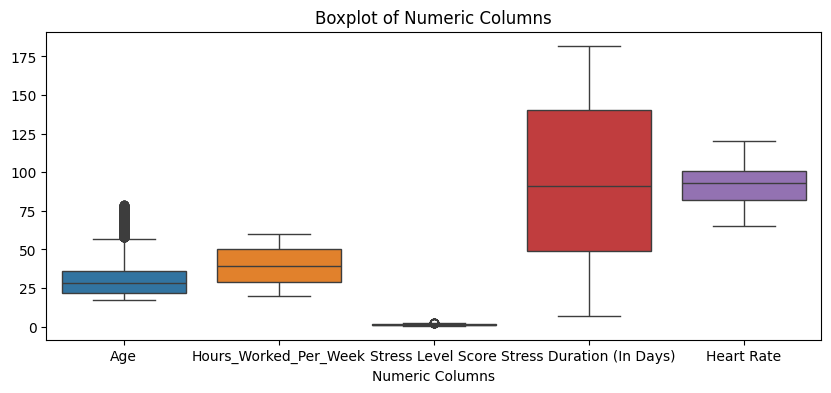

In [18]:
# Find any outliers in numeric cloumns

plt.figure(figsize=(10,4))
sns.boxplot(data=df)
plt.title('Boxplot of Numeric Columns')
plt.xlabel("Numeric Columns")
plt.show()

- There are some outliers in the Age column, but since age naturally varies from person to person, we don't need to remove them.
- Outlier handling is not required for this dataset because the value differences are natural.

**->  As a precaution, we are creating another DataFrame with outliers removed from the Age column, which can be used later if the model's performance is not satisfactory.**

Oulier removed dataset shape :(4630, 15)


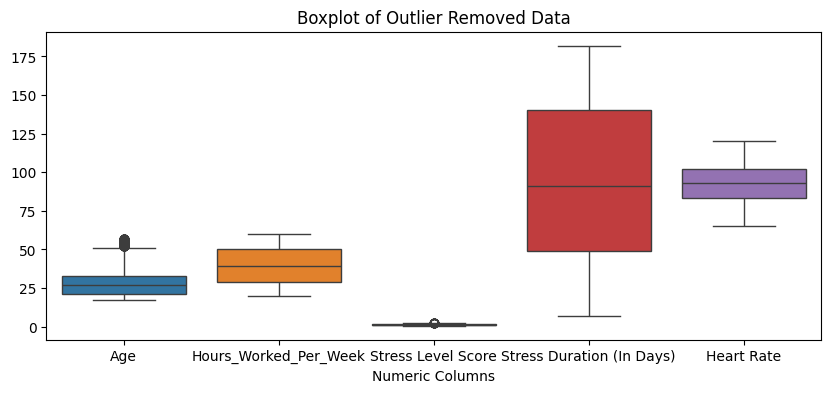

In [19]:
# Detecting outliers using the IQR (Interquartile Range) method

# Calculating IQR
Q1 = df["Age"].quantile(0.25)
Q3 = df["Age"].quantile(0.75)
IQR = Q3 - Q1

# Calculating Lower & Upper_bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Removing outliers
OR_df = df[(df["Age"] >= lower_bound) & (df["Age"] <= upper_bound)]

# Check total shape of outlier removed Dataset
print(f"Oulier removed dataset shape :{OR_df.shape}")

# Boxplot for outlier removed dataset

plt.figure(figsize=(10,4))
sns.boxplot(data=OR_df)
plt.title("Boxplot of Outlier Removed Data")
plt.xlabel("Numeric Columns")
plt.show()

In [20]:
df.isnull().sum()

,0
ID,0
Full Name,9
Gender,29
Industry,23
Test Date,0
Age,34
Hours_Worked_Per_Week,43
Stress Source,22
Coping Mechanism,46
Stress Level Score,0


- ## **2.1 Data Pre-processing and Handling missing values:**

* ###  As we discussed before, use the mode method for categorical columns and the mean or median for numerical columns.




In [21]:
# Change Test Date Dtypes to Datetime format.
df["Test Date"] = pd.to_datetime(df["Test Date"],dayfirst=True)

### **2.1.1 Categorical Columns**

In [22]:
#Remove the missing values in the Full Name column and rename the column to Employee_Name for clarity

df.rename(columns={"Full Name":"Employee_Name"},inplace=True)
df = df.dropna(subset=["Employee_Name"])

df.shape  # remove 9 missing rows, dataset contains 5000 records, so removing 9 missing values will not affect our prediction.

(4991, 15)

In [23]:
# Handiling missing values in Gender column
print("Before handling:\n",df["Gender"].unique())

df["Gender"]=df["Gender"].replace({"female":"Female","male":"Male","m":"Male","f":"Female"})
df["Gender"] = df["Gender"].fillna(df["Gender"].mode()[0])

print("After handling:\n",df["Gender"].unique())

Before handling:
 ['Male' 'Female' nan 'female' 'male' 'm' 'f']
After handling:
 ['Male' 'Female']


In [24]:
# Handling missing values in Industry column
print("Before handling:\n",df["Industry"].unique())
df['Industry'] = df['Industry'].fillna(df['Industry'].mode()[0])
print("After handling:\n",df["Industry"].unique())

Before handling:
 ['Healthcare' 'IT' 'Education' 'Finance' 'Consulting' 'Manufacturing'
 'Retail' nan]
After handling:
 ['Healthcare' 'IT' 'Education' 'Finance' 'Consulting' 'Manufacturing'
 'Retail']


In [25]:
# Handling missing values in Stress Source column
print("Before handling:\n",df["Stress Source"].unique())
df['Stress Source'] = df['Stress Source'].fillna(df['Stress Source'].mode()[0])
print("After handling:\n",df["Stress Source"].unique())

Before handling:
 ['Work' nan 'Financial Issues' 'Family Issues' 'Health' 'Loneliness'
 'Relationships' 'Bullying' 'Loss of Loved Ones' 'School' 'Social Media'
 'Relatinships']
After handling:
 ['Work' 'Financial Issues' 'Family Issues' 'Health' 'Loneliness'
 'Relationships' 'Bullying' 'Loss of Loved Ones' 'School' 'Social Media'
 'Relatinships']


In [26]:
# Handling missing values in Coping Mechanism column
print("Before handling:\n",df["Coping Mechanism"].unique())
df['Coping Mechanism'] = df['Coping Mechanism'].fillna(df['Coping Mechanism'].mode()[0])
print("After handling:\n",df["Coping Mechanism"].unique())

Before handling:
 ['Meditation' 'Therapy' 'Food' 'Exercise' 'Hobbies' nan 'Reading'
 'Walking' 'Sleeping' 'Talking to Family' 'Gardening' 'Art' 'Music']
After handling:
 ['Meditation' 'Therapy' 'Food' 'Exercise' 'Hobbies' 'Reading' 'Walking'
 'Sleeping' 'Talking to Family' 'Gardening' 'Art' 'Music']


In [27]:
# Handling missing values in Sleep Quality column
print("Before handling:\n",df["Sleep Quality"].unique())

df["Sleep Quality"]=df["Sleep Quality"].replace({"fair":"Fair","good":"Good","poor":"Poor"})
df["Sleep Quality"] = df["Sleep Quality"].fillna(df["Sleep Quality"].mode()[0])

print("After handling:\n",df["Sleep Quality"].unique())

Before handling:
 ['Fair' 'Good' 'Poor' 'poor' 'good' nan 'fair']
After handling:
 ['Fair' 'Good' 'Poor']


In [28]:
# Handling missing values in Mode column
print("Before handling:\n",df["Mood"].unique())
df['Mood'] = df['Mood'].fillna(df['Mood'].mode()[0])
print("After handling:\n",df["Mood"].unique())

Before handling:
 ['Neutral' 'Sad' 'Happy' nan]
After handling:
 ['Neutral' 'Sad' 'Happy']


### **2.1.2 Numerical Columns**

In [29]:
missing_num_col = ["Age","Hours_Worked_Per_Week","Stress Duration (In Days)","Heart Rate"]

# Using Median method to fill the missing value in Numerical columns
for col in missing_num_col:
  print(f"{col} Missing value before imputation : {df[col].isnull().sum()}\n")
  df[col] = df[col].fillna(df[col].median())
  print(f"{col} Missing value after imputation :{df[col].isnull().sum()}\n")

Age Missing value before imputation : 34

Age Missing value after imputation :0

Hours_Worked_Per_Week Missing value before imputation : 43

Hours_Worked_Per_Week Missing value after imputation :0

Stress Duration (In Days) Missing value before imputation : 102

Stress Duration (In Days) Missing value after imputation :0

Heart Rate Missing value before imputation : 90

Heart Rate Missing value after imputation :0



In [30]:
df.isnull().sum() # Cross-check if there are any missing values remaining after imputation.

,0
ID,0
Employee_Name,0
Gender,0
Industry,0
Test Date,0
Age,0
Hours_Worked_Per_Week,0
Stress Source,0
Coping Mechanism,0
Stress Level Score,0


- ## **2.2 Skewness for Numerical value:**
- Skewness tells you how much a distribution of data leans

In [31]:
Skewed_numerical_c = df.select_dtypes(include=["float64"]).columns

# Drop Age Columns in the variable
Skewed_numerical_c = Skewed_numerical_c.drop("Age") # Age is a naturally bounded variable

for col in Skewed_numerical_c:
    print(f"{col} skewness: {df[col].skew():.2f}")

Hours_Worked_Per_Week skewness: 0.04
Stress Level Score skewness: 0.17
Stress Duration (In Days) skewness: 0.03
Heart Rate skewness: -0.01


- The skewness values for all the numerical features fall between -0.5 and 0.5, indicating that the distributions are fairly symmetrical.
- Therefore, no transformation such as Log or square root is required, as all the features are already close to a normal distribution.

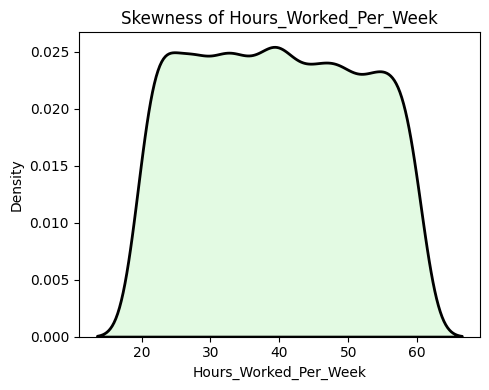

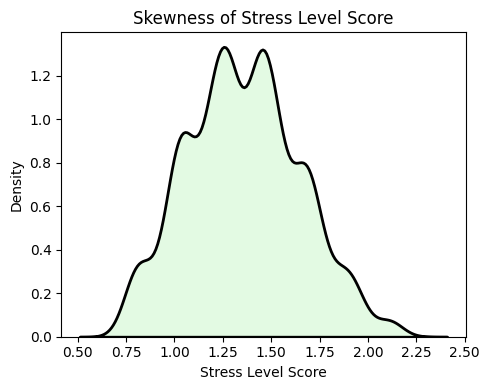

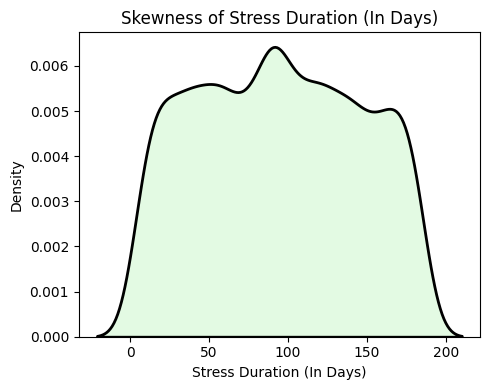

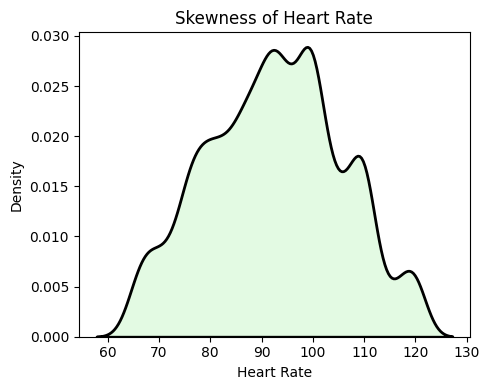

In [32]:
# Using KDE plots to visualize the distribution and assess the skewness of the data

for col in Skewed_numerical_c:
    plt.figure(figsize=(5,4))
    sns.kdeplot(data=df[col], fill=True,color="lightgreen",linewidth=2,edgecolor="k")
    plt.title(f"Skewness of {col}")
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

## **2.3 Univariate Analysis:**

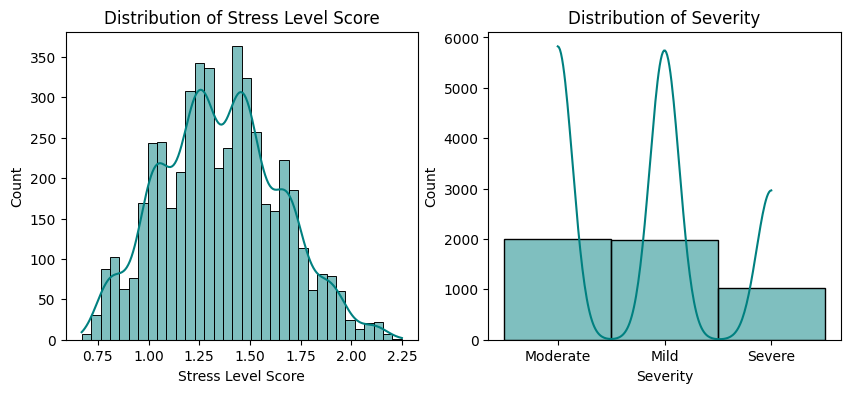

In [33]:
# Distribution Of target values

plt.figure(figsize=(10,4))

# Stress level
plt.subplot(1,2,1)
sns.histplot(df["Stress Level Score"], kde=True,color="teal")
plt.title("Distribution of Stress Level Score")
plt.xlabel("Stress Level Score")

# Severity Condition
plt.subplot(1,2,2)
sns.histplot(df["Severity"], kde=True, color="teal")
plt.title("Distribution of Severity")
plt.xlabel("Severity")

plt.show()

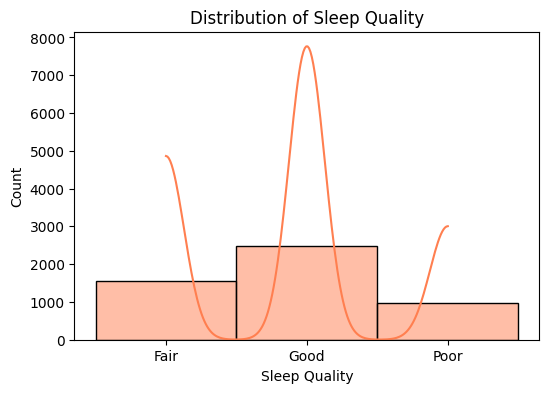

In [ ]:
# Distrubition of Sleep Quality
plt.figure(figsize=(6,4))
sns.histplot(df["Sleep Quality"], kde=True,color="Coral")
plt.title("Distribution of Sleep Quality")
plt.xlabel("Sleep Quality")
plt.show()

- The visualization shows the sleep quality of employees. It appears that their sleep quality is generally good, yet they are still experiencing stress, which may be due to other sources such as work-related pressure or family issues.

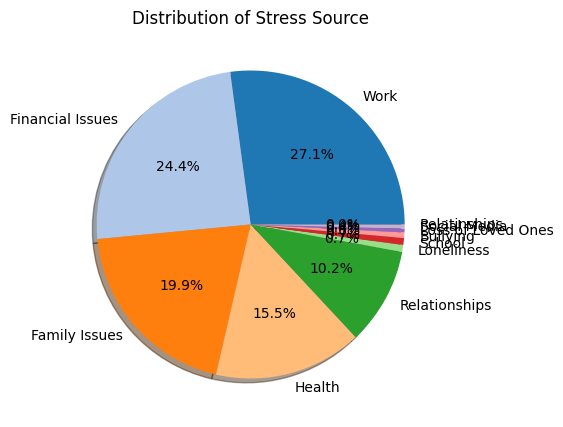

In [ ]:
# Distribution of Stress Source

Stress_issue = df['Stress Source'].value_counts() # load into the dataframe

plt.figure(figsize=(6,5))
plt.pie(Stress_issue, labels=Stress_issue.index, autopct='%1.1f%%',colors = plt.cm.tab20.colors,shadow=True)
plt.title('Distribution of Stress Source')
plt.show()

- The pie chart clearly shows that most employees are experiencing stress due to work, financial issues, and family issues — with work being the most significant source. Other stress sources appear to be minor in comparison.

## **2.4 Bivariate Analysis:**

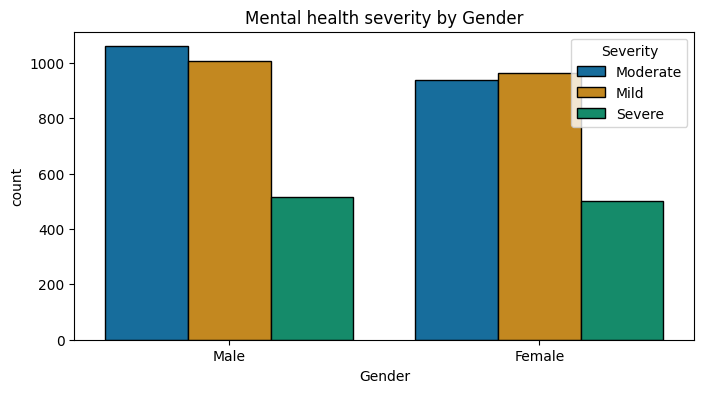

In [ ]:
# Severity vs Gender
plt.figure(figsize=(8,4))
sns.countplot(data=df,x="Gender",hue="Severity",edgecolor="k",palette="colorblind")
plt.title("Mental health severity by Gender")
plt.xlabel("Gender")
plt.show()

- The current visualization shows that male employees are experiencing higher stress levels compared to female employees.

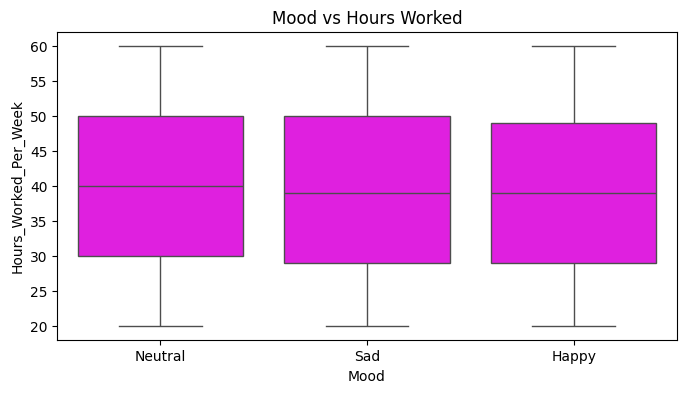

In [ ]:
# Mood vs Hour_worked_per_week

plt.figure(figsize=(8,4))
sns.boxplot(data=df, x="Mood", y="Hours_Worked_Per_Week",color="magenta")
plt.title("Mood vs Hours Worked")
plt.show()

- The chart shows that most employees work around 30 to 50 hours per week. However, their mood is fairly balanced across all categories — Neutral, Sad, and Happy.

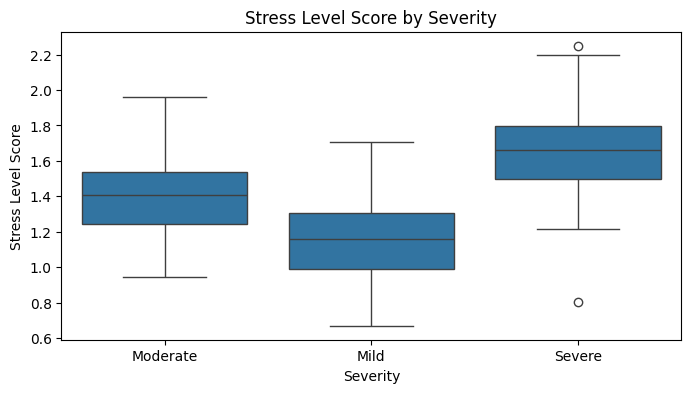

In [ ]:
# Stress level by Severity
plt.figure(figsize=(8,4))
sns.boxplot(data=df,x="Severity",y="Stress Level Score")
plt.title("Stress Level Score by Severity")
plt.xlabel("Severity")
plt.ylabel("Stress Level Score")
plt.show()

- This chart shows that as stress level score increases, the Severity level also increases.This means that many employees are likely facing high levels of stress and need support.

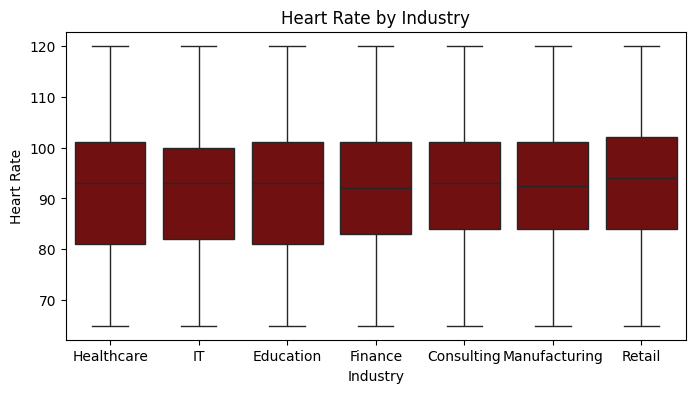

In [ ]:
# Industry vs Heart rate
plt.figure(figsize=(8,4))
sns.boxplot(data=df, x="Industry", y="Heart Rate", color="maroon")
plt.title("Heart Rate by Industry")
plt.show()

- The boxplot shows the heart rate of employees working in different industries. Most have similar heart rates, but it appears that employees in the Healthcare, IT, and Education sectors have slightly higher heart rates.

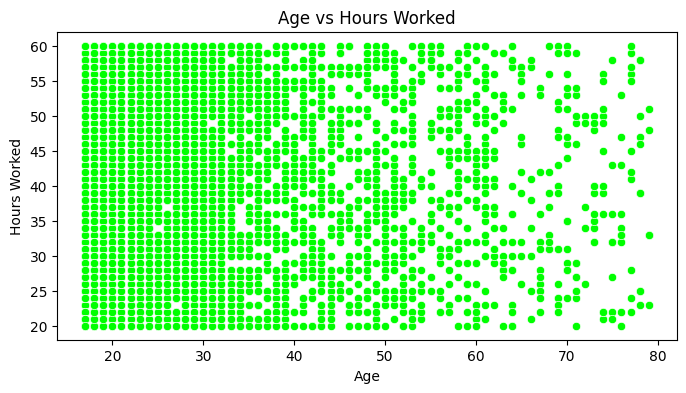

In [ ]:
# Age vs Hours_worked_per_week
plt.figure(figsize=(8,4))
sns.scatterplot(data=df,x="Age",y="Hours_Worked_Per_Week",color="lime")
plt.title("Age vs Hours Worked")
plt.xlabel("Age")
plt.ylabel("Hours Worked")
plt.show()

- The chart shows that employees aged between 20 to 50 are working more hours per week. This indicates that the most active and possibly most stressed age group falls within this range.

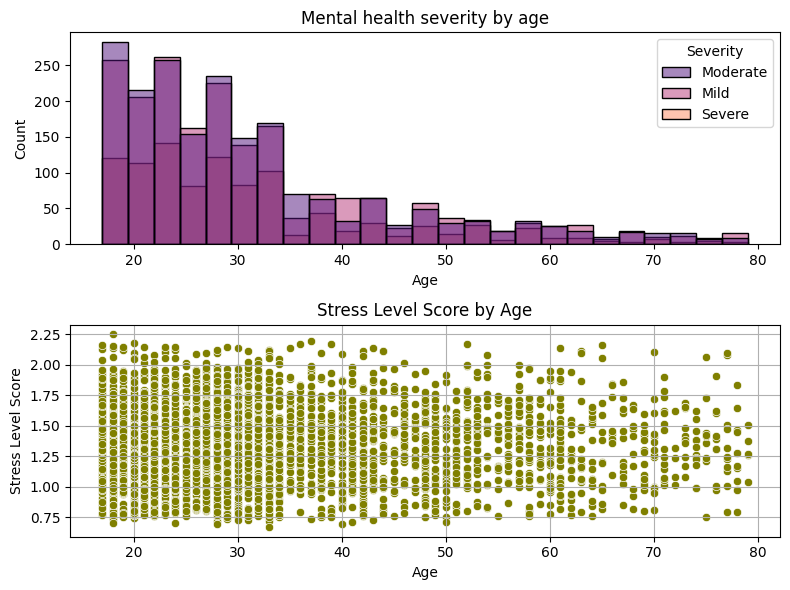

In [ ]:
plt.figure(figsize=(8,6))

# Severity by Age
plt.subplot(2,1,1)
sns.histplot(data=df,x="Age",hue="Severity",bins=25,palette="magma")
plt.title("Mental health severity by age")
plt.xlabel("Age")

# Stress Level Score by Age
plt.subplot(2,1,2)
sns.scatterplot(data=df,x="Age",y="Stress Level Score",color="olive")
plt.title("Stress Level Score by Age")
plt.xlabel("Age")
plt.ylabel("Stress Level Score")
plt.grid(True)
plt.tight_layout()

plt.show()

- The two charts show that many employees affected by stress and facing health issues are between the ages of 20 and 30

## **2.5 Multivariate Analysis:**

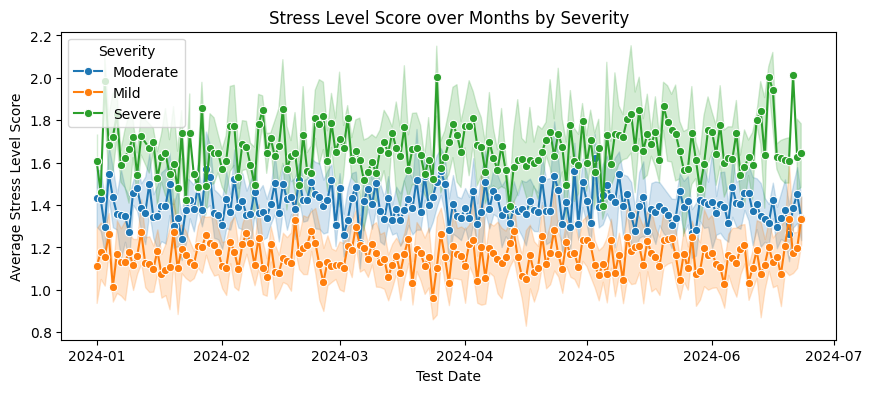

In [ ]:
# Monthly Trends of Stress Levels by Severity
plt.figure(figsize=(10,4))
sns.lineplot(data=df, x="Test Date", y="Stress Level Score", hue="Severity", marker="o")
plt.title("Stress Level Score over Months by Severity")
plt.xlabel("Test Date")
plt.ylabel("Average Stress Level Score")
plt.show()

- The plot shows stress levels from January to June 2024 for three groups: Mild, Moderate, and Severe. Employees with severe stress have the highest scores throughout, while mild stress scores stay the lowest. All groups show some ups and downs, but overall, stress levels stay fairly steady over time.

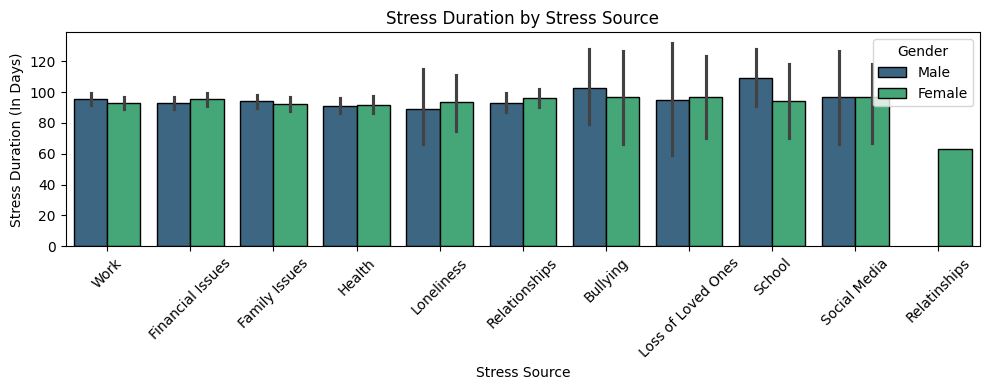

In [ ]:
# Identify which stress sources cause longer stress

plt.figure(figsize=(10,4))
sns.barplot(data=df, x="Stress Source", y="Stress Duration (In Days)", hue="Gender", edgecolor="k",palette="viridis")
plt.title("Stress Duration by Stress Source")
plt.xticks(rotation=(45))
plt.tight_layout()
plt.show()

- The chart shows that the longest sources of stress are bullying, love failure, school and social media. Males are experiencing more stress compared to females.

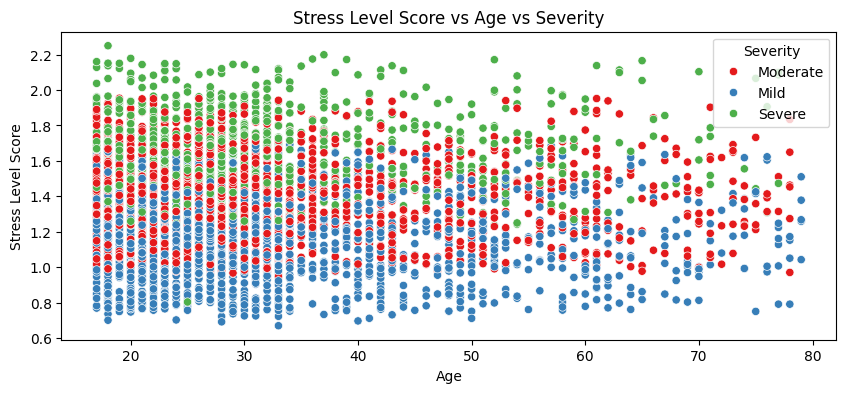

In [ ]:
# Stress level Score vs Age vs Severity

plt.figure(figsize=(10,4))
sns.scatterplot(data=df,x="Age",y="Stress Level Score",hue="Severity",palette="Set1")
plt.title("Stress Level Score vs Age vs Severity")
plt.xlabel("Age")
plt.ylabel("Stress Level Score")
plt.show()

- The chart shows that younger employees (around 20 to 40 years old) mostly have higher stress levels, especially severe stress. As age increases, the stress levels seem to get lower, and mild stress is more common in older employees

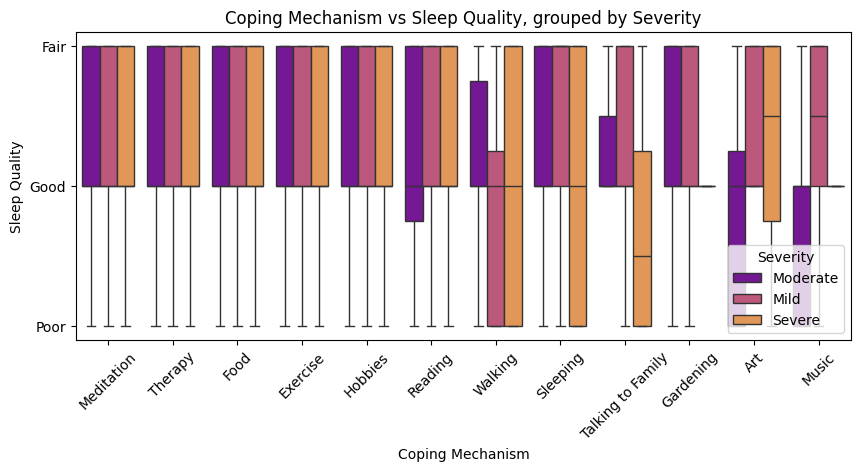

In [ ]:
# Coping Mechanism vs Sleep Quality, grouped by Severity
plt.figure(figsize=(10,4))
sns.boxplot(data=df, x="Coping Mechanism", y="Sleep Quality",hue="Severity",palette="plasma")
plt.title("Coping Mechanism vs Sleep Quality, grouped by Severity")
plt.xlabel("Coping Mechanism")
plt.ylabel("Sleep Quality")
plt.xticks(rotation=45)
plt.show()

- Coping mechanisms like meditation, exercise, and therapy are linked to better sleep regardless of stress severity, while others like walking or art may not be as helpful for severely stressed individuals

# **Stage - 3.1 : Feature Engineering**

- Label Encoding helps convert categorical values (both binary and multiclass) into numerical values by assigning each category a unique integer.
- One-Hot Encoding is used to convert multiclass categorical values into numerical form by creating separate binary columns for each category.

In [34]:
# Importing necessary libraries for Feature engineering

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

le = LabelEncoder()

> NOTE: Since using get_dummies() on a multiclass column creates too many features, I used Label Encoding instead for better understanding and simplicity of the data.



In [35]:
# Converting Binary Column (Gender) male/female to 1/0:

df["Gender"] = le.fit_transform(df["Gender"])

# Using Map Function to Convert the Ordinal data like (low,medium,high) to 0,1,2:

df["Severity"] = df["Severity"].map({"Mild":0,"Moderate":1,"Severe":2})
df["Mood"] = df["Mood"].map({"Sad":0,"Neutral":1,"Happy":2})
df["Sleep Quality"] = df["Sleep Quality"].map({"Fair":0,"Good":1,"Poor":2})

# Converting Multiclass Column using Label Encoding :
Multi_class_col = ["Industry","Stress Source","Coping Mechanism"]
for col in Multi_class_col:
  df[col] = le.fit_transform(df[col])

df.head()

,ID,Employee_Name,Gender,Industry,Test Date,Age,Hours_Worked_Per_Week,Stress Source,Coping Mechanism,Stress Level Score,Stress Duration (In Days),Sleep Quality,Mood,Heart Rate,Severity
0,MZBOIP,Piatkow Ringo,1,3,2024-02-21,22.0,47.0,10,5,1.536827,105.0,0,1,110.0,1
1,3Y4IZ8,Scobbie Cindy,0,4,2024-05-16,34.0,52.0,10,10,1.010803,126.0,1,1,85.0,0
2,MUPSI3,Colbourne Phineas,1,1,2024-03-22,21.0,46.0,10,2,1.943102,161.0,2,0,93.0,1
3,078R72,Hustler Patience,0,2,2024-01-31,30.0,32.0,10,2,1.066576,133.0,1,1,83.0,0
4,VKFCOD,Weiner Clareta,0,0,2024-05-14,24.0,35.0,2,2,1.023504,91.0,0,2,93.0,0


# **3.2 : Feature Selection:**



- ### 3.2.1 Using Correlation matrix to understand how strongly each feature is related to a target variables.

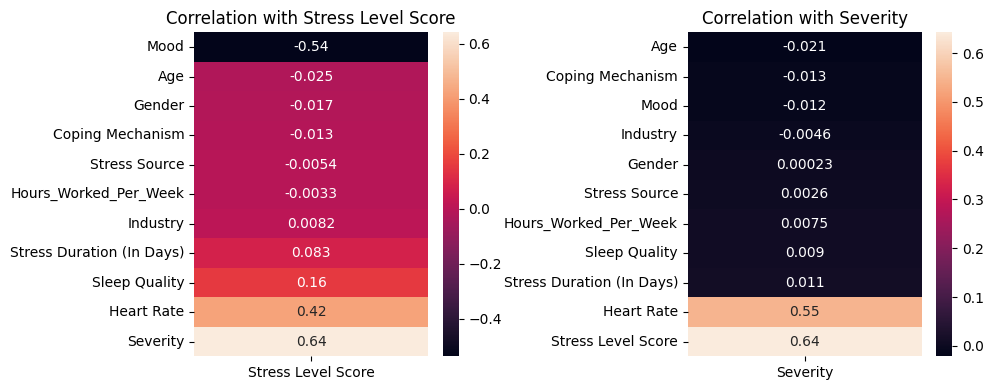

In [36]:
# Correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Select & Sort Stress Level Score correlations in ascending order
stress_corr = corr_matrix[["Stress Level Score"]].drop(["Stress Level Score"])
stress_corr = stress_corr.sort_values(by="Stress Level Score", ascending=True)

# Select & Sort Severity correlations in ascending order
stress_corr_se = corr_matrix[["Severity"]].drop(["Severity"])
stress_corr_se = stress_corr_se.sort_values(by="Severity", ascending=True)

# Plot heatmap
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.heatmap(stress_corr, annot=True)
plt.title("Correlation with Stress Level Score")
plt.tight_layout()

plt.subplot(1,2,2)
sns.heatmap(stress_corr_se, annot=True)
plt.title("Correlation with Severity")
plt.tight_layout()

plt.show()

- The above heatmap displays how each feature is related to the target variables.

> ### **3.2.2 Selecting Feature For Regression Model:**

Note: Severity has an extremely strong positive correlation with the target. But using Severity as a feature may cause target leakage, so we should exclude it to avoid cheating the model.

1. **Heart Rate**:- Strong positive relationship with stress.
   - Higher heart rate indicates higher stress
2. **Mood**:- Strong negative relationship.
   - Negative moods increase stress levels
3. **Sleep Quality**:- Moderate positive link.
   - Poor sleep quality contributes to stress
4. **Stress Duration (In Days)**:- Weak but meaningful
   - Longer exposure may increase stress level







> ### **3.2.3 Selecting Feature for Classification Model:**

Note: Only two features are highly correlated. But using only these two features may cause underfitting. So, it's better to add some relevant domain-specific features to improve the model's performance.

1. **Stress Level Score**:- Strong positive relationship.
  - Directly influences severity, must be included.Employees with high scores likely fall into "High Severity".
2. **Heart Rate**:- Strong positive relationship.
  -  Higher stress severity often raises heart rate

**All the other selected features show weak correlation, but we include them based on domain knowledge.**  

3. **Sleep Quality**:-
   - Poor sleep could result in severe stress cases
4. **Stress Duration**:-
   - Longer stress exposure contributes to severity
5. **Coping Mechanism**:-
   - Different coping strategies impact how stress is managed.

In [37]:
# Load the Selcted feature into variable

# For Reagression Model:
X_reg = df[["Heart Rate","Mood","Sleep Quality","Stress Duration (In Days)"]]
y_reg = df["Stress Level Score"]

# For Classification Model:
X_clas = df[["Stress Level Score","Heart Rate","Sleep Quality","Stress Duration (In Days)","Coping Mechanism"]]
y_clas = df["Severity"]

# **3.3 : Feature Scaling:**

In [38]:
# Split the Data
from sklearn.model_selection import train_test_split

# Regression model
X_train_reg,X_test_reg,y_train_reg,y_test_reg=train_test_split(X_reg,y_reg,test_size=0.2,random_state=42)

# Calassification model
X_train_clas,X_test_clas,y_train_clas,y_test_clas=train_test_split(X_clas,y_clas,test_size=0.2,random_state=42)

In [39]:
# check the split data shape

print("Regression Model:-\n")
print(f" X_train_reg shape : {X_train_reg.shape} ")
print(f" X_test_reg shape : {X_test_reg.shape} ")
print(f" y_train_reg shape : {y_train_reg.shape} ")
print(f" y_test_reg shape : {y_test_reg.shape} \n")

print("Classification Model:-\n")
print(f" X_train_clas shape : {X_train_clas.shape} ")
print(f" X_test_clas shape : {X_test_clas.shape} ")
print(f" y_train_clas shape : {y_train_clas.shape} ")
print(f" y_test_clas shape : {y_test_clas.shape} ")

Regression Model:-

 X_train_reg shape : (3992, 4) 
 X_test_reg shape : (999, 4) 
 y_train_reg shape : (3992,) 
 y_test_reg shape : (999,) 

Classification Model:-

 X_train_clas shape : (3992, 5) 
 X_test_clas shape : (999, 5) 
 y_train_clas shape : (3992,) 
 y_test_clas shape : (999,) 


In [40]:
# Feature Scaling:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Regression model
X_train_scaled_reg = scaler.fit_transform(X_train_reg)
X_test_scaled_reg = scaler.transform(X_test_reg)

# Classification model
X_train_scaled_clas = scaler.fit_transform(X_train_clas)
X_test_scaled_clas = scaler.transform(X_test_clas)

# **Stage - 4 : Model Building And Evaluation:**

- ## **4.1 Regression Models:**

- **Compare different regression model:**

In [41]:
# Import the required libraries and models used for regression tasks:

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error,root_mean_squared_error

In [42]:
# Dictionary of models
r_models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(),
    "KNN Regressor": KNeighborsRegressor(),
    "XGBoost Regressor": XGBRegressor()
}

# Train and evaluate models
for name, model in r_models.items():
    model.fit(X_train_scaled_reg, y_train_reg)
    y_pred_reg = model.predict(X_test_scaled_reg)

    print(f"\n{name} Results:")
    print(f"R2 Score: {r2_score(y_test_reg, y_pred_reg):.4f}")
    print(f"Mean Absolute Error: {mean_absolute_error(y_test_reg, y_pred_reg):.4f}")
    print(f"Mean Squared Error: {mean_squared_error(y_test_reg, y_pred_reg):.4f}")
    print(f"Root Mean Squared Error: {root_mean_squared_error(y_test_reg, y_pred_reg):.4f}")


Linear Regression Results:
R2 Score: 0.4921
Mean Absolute Error: 0.1740
Mean Squared Error: 0.0439
Root Mean Squared Error: 0.2094

Random Forest Results:
R2 Score: 0.7310
Mean Absolute Error: 0.1168
Mean Squared Error: 0.0232
Root Mean Squared Error: 0.1524

KNN Regressor Results:
R2 Score: 0.7521
Mean Absolute Error: 0.1161
Mean Squared Error: 0.0214
Root Mean Squared Error: 0.1463

XGBoost Regressor Results:
R2 Score: 0.7460
Mean Absolute Error: 0.1155
Mean Squared Error: 0.0219
Root Mean Squared Error: 0.1481


- **Among all models, KNN Regressor is the best performer overall with
highest r2score(0.7521) and It also has the lowest RMSE (0.1463), indicating it makes the smallest overall prediction errors**



In [43]:
# train best model
Knn_model = KNeighborsRegressor()
Knn_model.fit(X_train_scaled_reg, y_train_reg)
y_pred_reg = Knn_model.predict(X_test_scaled_reg)

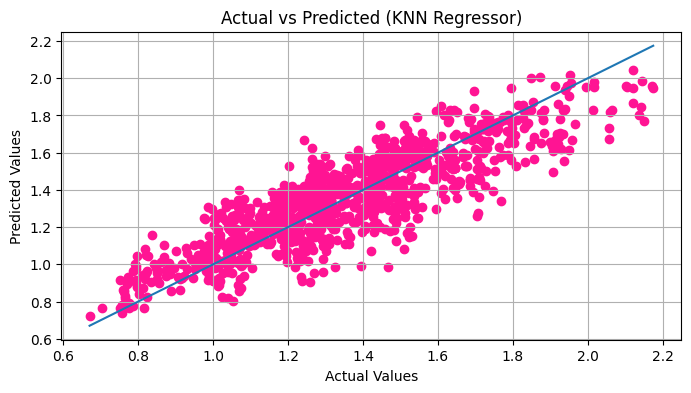

In [44]:
# Visualize Actual vs predicted score
plt.figure(figsize=(8,4))
plt.scatter(y_test_reg, y_pred_reg, color='deeppink')
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()])
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted (KNN Regressor)')
plt.grid(True)
plt.show()

- ## **4.2 Classification Model:**

- **Compare different Calssification model**

In [48]:
# Import the required libraries and models used for Classification tasks:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, f1_score

In [49]:
# Dictionary of models
c_models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),

}

for name, model in c_models.items():
    model.fit(X_train_scaled_clas, y_train_clas)
    y_pred_clas = model.predict(X_test_scaled_clas)

    print(f"\n{name} Results:")
    print(f"Accuracy: {accuracy_score(y_test_clas, y_pred_clas):.4f}")
    print(f"F1 Score: {f1_score(y_test_clas, y_pred_clas, average='weighted'):.4f}")


Logistic Regression Results:
Accuracy: 0.6567
F1 Score: 0.6572

Decision Tree Results:
Accuracy: 0.7257
F1 Score: 0.7268

Random Forest Results:
Accuracy: 0.7568
F1 Score: 0.7577

SVM Results:
Accuracy: 0.7117
F1 Score: 0.7124

KNN Results:
Accuracy: 0.6767
F1 Score: 0.6762


- **Random Forest classifier delivered the highest performance, with an Accuracy of 75% and an F1 Score of 0.75. This indicates that RandomForest made the most balanced and accurate predictions.**

In [50]:
# train best model
RFC = RandomForestClassifier( n_estimators=100,max_depth=None)
RFC.fit(X_train_scaled_clas, y_train_clas)

y_pred_clas = RFC.predict(X_test_scaled_clas)

### Confusion Matrix for Classification Model:

              precision    recall  f1-score   support

           0       0.78      0.79      0.79       391
           1       0.66      0.74      0.70       391
           2       0.88      0.65      0.75       217

    accuracy                           0.74       999
   macro avg       0.77      0.73      0.75       999
weighted avg       0.76      0.74      0.74       999

[[310  79   2]
 [ 83 291  17]
 [  4  71 142]]


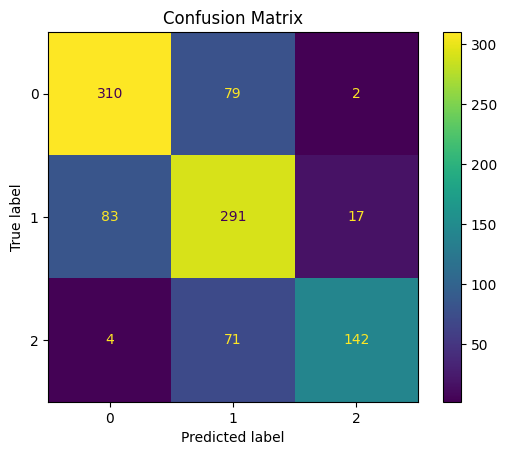

In [51]:
from sklearn.metrics import confusion_matrix,classification_report
c_r = classification_report(y_test_clas, y_pred_clas)
c_m= confusion_matrix(y_test_clas, y_pred_clas)
print(c_r)
print(c_m)

# visualise Confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(RFC,X_test_scaled_clas, y_test_clas)
plt.title('Confusion Matrix')
plt.show()

## 4.3 Hyperparameter Tuning:
- Hyperparameter tuning is the process of optimizing the parameter of a machine learning model to improve its performance.

- We Use GridSearch CV for tuning our model

### For regression model tuning, the KNN Regressor was selected as the best-performing model.

Commonly used parameters for K-Nearest Neighbors:
- **n_neighbors** - Number of neighbors to use for prediction.
- **weights** - How to weight the contribution of neighbors
- **metric** - Distance calculation method


In [53]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid_r = {
    'n_neighbors': list(range(3, 21, 2)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']  }

# Setup GridSearchCV
grid_search_r = GridSearchCV(estimator=Knn_model, param_grid=param_grid_r,
                           cv=5, scoring='r2', n_jobs=-1, verbose=1)

# Fit to training data
grid_search_r.fit(X_train_scaled_reg, y_train_reg)

# Print best parameters and best R2 score
print("Best KNN Regressor Parameters:", grid_search_r.best_params_)
print("Best R² Score:", grid_search_r.best_score_)



Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best KNN Regressor Parameters: {'metric': 'manhattan', 'n_neighbors': 19, 'weights': 'uniform'}
Best R² Score: 0.7607652192515033


In [ ]:
# Evaluate on the best test set
best_knn = grid_search_r.best_estimator_
y_pred_reg = best_knn.predict(X_test_scaled_reg)

print(f"R2 Score: {r2_score(y_test_reg, y_pred_reg):.4f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test_reg, y_pred_reg):.4f}")
print(f"Mean Squared Error: {mean_squared_error(y_test_reg, y_pred_reg):.4f}")
print(f"Root Mean Squared Error: {root_mean_squared_error(y_test_reg, y_pred_reg):.4f}")

R2 Score: 0.7548
Mean Absolute Error: 0.1212
Mean Squared Error: 0.0212
Root Mean Squared Error: 0.1455


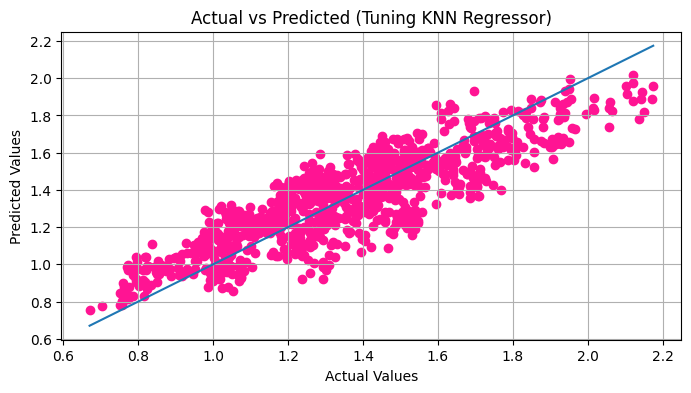

In [ ]:
# Visualize Actual vs predicted score for tuning model
plt.figure(figsize=(8,4))
plt.scatter(y_test_reg, y_pred_reg, color='deeppink')
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()])
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted (Tuning KNN Regressor)')
plt.grid(True)
plt.show()

- After tuning, the best regression model's R² score slightly increased.

### For the classification model tuning, RandomForest Classifier was selected as the best-performing model.



In [55]:
# Define the parameter grid
param_grid_c = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}


# Setup GridSearchCV
grid_search_c = GridSearchCV(
    estimator=RFC,
    param_grid=param_grid_c,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Fit to training data
grid_search_c.fit(X_train_scaled_clas, y_train_clas)

# Print best parameters and score
print("Best Parameters for Random Forest Classifier:", grid_search_c.best_params_)
print("Best Accuracy from CV:", grid_search_c.best_score_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters for XGBoost Classifier: {'max_depth': 7, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 150}
Best Accuracy from CV: 0.7457467197405279


Accuracy: 0.7477
F1 Score: 0.7488

Confusion Matrix:
 [[309  82   0]
 [ 75 310   6]
 [  0  89 128]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.79      0.80       391
           1       0.64      0.79      0.71       391
           2       0.96      0.59      0.73       217

    accuracy                           0.75       999
   macro avg       0.80      0.72      0.75       999
weighted avg       0.77      0.75      0.75       999



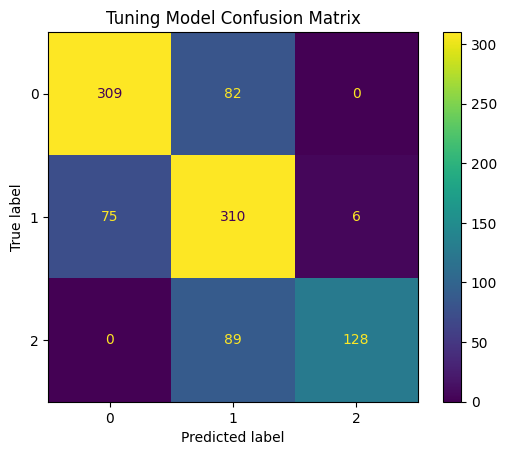

In [56]:
# Evaluate on the best test set
best_xgb = grid_search_c.best_estimator_
y_pred_clas = best_xgb.predict(X_test_scaled_clas)

print(f"Accuracy: {accuracy_score(y_test_clas, y_pred_clas):.4f}")
print(f"F1 Score: {f1_score(y_test_clas, y_pred_clas, average='weighted'):.4f}")
print("\nConfusion Matrix:\n", confusion_matrix(y_test_clas, y_pred_clas))
print("\nClassification Report:\n", classification_report(y_test_clas, y_pred_clas))

# visualise Confusion matrix for tuning model
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(best_xgb,X_test_scaled_clas, y_test_clas)
plt.title('Tuning Model Confusion Matrix')
plt.show()

- After tuning, the best classification model's accuracy and f1 score slightly increased.

# Project Conclusion:

In this machine learning project, we aimed to develop and evaluate models for both regression and classification tasks using a structured approach:

1. **Data Preprocessing:** We began by scaling the datasets to ensure that all features contributed equally to the model training process.

2. **Model Training and Evaluation:**

 - **Regression:** We experimented with various regression models. After evaluating their performance, the K-Nearest Neighbors (KNN) Regressor emerged as the best-performing model. Through hyperparameter tuning using GridSearchCV, we optimized its parameters to achieve an R² score of 0.7548, a Mean Absolute Error (MAE) of 0.1212, and a Mean Squared Error (MSE) of 0.0212 on the test set.

 - **Classification:** For classification tasks, multiple models were assessed. The RandomForest Classifier stood out, delivering the highest performance with an accuracy of 75% and an F1 score of 0.75.

3. **Model Selection:**

- **Best Regression Model:** Tuned KNN Regressor

- **Best Classification Model:** RandomForest Classifier.

4. **Insights:**

- Hyperparameter tuning led to noticeable improvements, especially in classification:

- RandomForest Classifier's accuracy decreased by 0.50%, and F1 score by 0.0046.

- KNN Regressor showed a slight increase in R² (0.0027) and a small reduction in MSE and RMSE, though MAE slightly increased.

- RandomForest proved highly effective in handling complex classification tasks.

- KNN Regressor remained a strong choice for regression, benefiting from careful tuning.